# demo
This is a demo for model temporal test and plot the result map and time series. Before this we trained a model using [train-lstm.py](train-lstm.py). By default the model will be saved in [here](output/CONUSv4f1/).

 - Load packages and target SMAP observation

In [1]:
import os
from hydroDL.data import dbCsv
from hydroDL.post import plot, stat
from hydroDL import master

cDir = os.getcwd()
rootDB = os.path.join(cDir, 'data')
tRange = [20160401, 20170401]
df = dbCsv.DataframeCsv(
    rootDB=rootDB, subset='CONUSv4f1', tRange=tRange)
yt = df.getData(varT='SMAP_AM', doNorm=False, rmNan=False)
yt = yt.squeeze()

loading package hydroDL
/home/kxf227/work/GitHUB/pyRnnSMAP/example/data/Subset/CONUSv4f1.csv
read /home/kxf227/work/GitHUB/pyRnnSMAP/example/data/CONUSv4f1/2016/SMAP_AM.csv 0.043489694595336914


 - Test the model in another year

In [2]:
out = os.path.join(cDir, 'output', 'CONUSv4f1')
yp = master.test(
    out, tRange=tRange, subset='CONUSv4f1')
yp = yp.squeeze()

/home/kxf227/work/GitHUB/pyRnnSMAP/example/data/Subset/CONUSv4f1.csv
read /home/kxf227/work/GitHUB/pyRnnSMAP/example/data/CONUSv4f1/2016/APCP_FORA.csv 0.04564547538757324
read /home/kxf227/work/GitHUB/pyRnnSMAP/example/data/CONUSv4f1/2016/DLWRF_FORA.csv 0.05148744583129883
read /home/kxf227/work/GitHUB/pyRnnSMAP/example/data/CONUSv4f1/2016/DSWRF_FORA.csv 0.051079750061035156
read /home/kxf227/work/GitHUB/pyRnnSMAP/example/data/CONUSv4f1/2016/TMP_2_FORA.csv 0.05147600173950195
read /home/kxf227/work/GitHUB/pyRnnSMAP/example/data/CONUSv4f1/2016/SPFH_2_FORA.csv 0.05448579788208008
read /home/kxf227/work/GitHUB/pyRnnSMAP/example/data/CONUSv4f1/2016/VGRD_10_FORA.csv 0.05189824104309082
read /home/kxf227/work/GitHUB/pyRnnSMAP/example/data/CONUSv4f1/2016/UGRD_10_FORA.csv 0.05310535430908203


 - Calculate statistic metrices and plot the result. An interactive map will be generated, where users can click on map to show time series of observation and model predictions. 

<IPython.core.display.Javascript object>


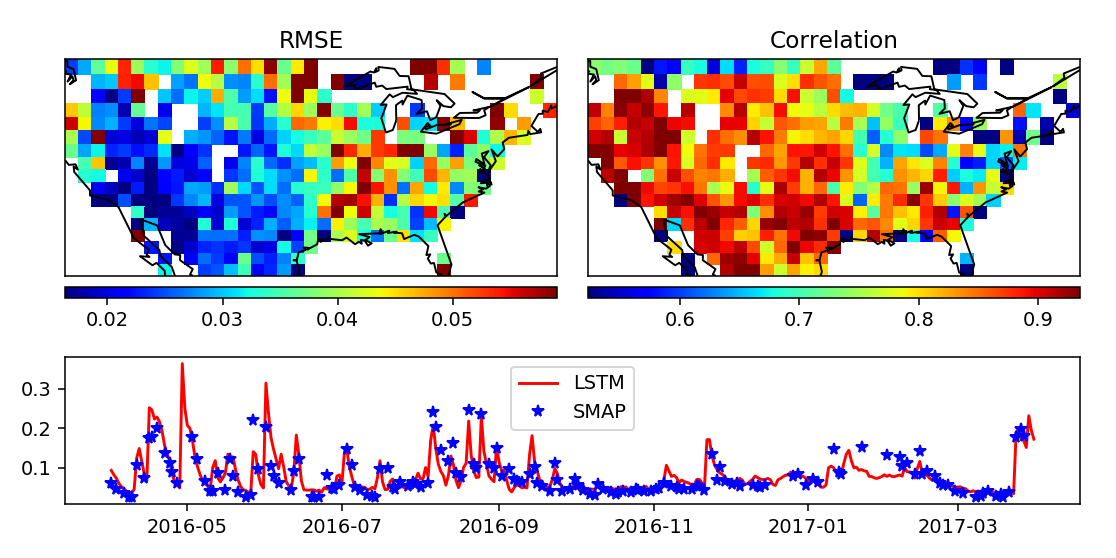

In [3]:
# calculate stat
statErr = stat.statError(yp, yt)
dataGrid = [statErr['RMSE'], statErr['Corr']]
dataTs = [yp, yt]
t = df.getT()
crd = df.getGeo()
mapNameLst = ['RMSE', 'Correlation']
tsNameLst = ['LSTM', 'SMAP']
colorMap = None
colorTs = None
# plot map and time series
%matplotlib notebook
plot.plotTsMap(
    dataGrid,
    dataTs,
    crd,
    t,
    colorMap=colorMap,
    mapNameLst=mapNameLst,
    tsNameLst=tsNameLst,
    figsize=[8,4])